In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
data = pd.read_csv("/Users/mihir/Downloads/flipkart_product.csv")
print(data.head())

                                         ProductName     Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?�?�(White...  �??3,999    5   
1  Candes 12 L Room/Personal Air Cooler?�?�(White...  �??3,999    5   
2  Candes 12 L Room/Personal Air Cooler?�?�(White...  �??3,999    3   
3  Candes 12 L Room/Personal Air Cooler?�?�(White...  �??3,999    1   
4  Candes 12 L Room/Personal Air Cooler?�?�(White...  �??3,999    3   

            Review                                            Summary  
0           Super!  Great cooler.. excellent air flow and for this...  
1          Awesome             Best budget 2 fit cooler. Nice cooling  
2             Fair  The quality is good but the power of air is de...  
3  Useless product                 Very bad product it's a only a fan  
4             Fair                                      Ok ok product  


In [31]:
#data = data[data.isna().any(axis=1)]
data=data.dropna(how='any',axis=0)
print(data.isnull().sum())

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64


In [32]:

import nltk
import re
#ltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)


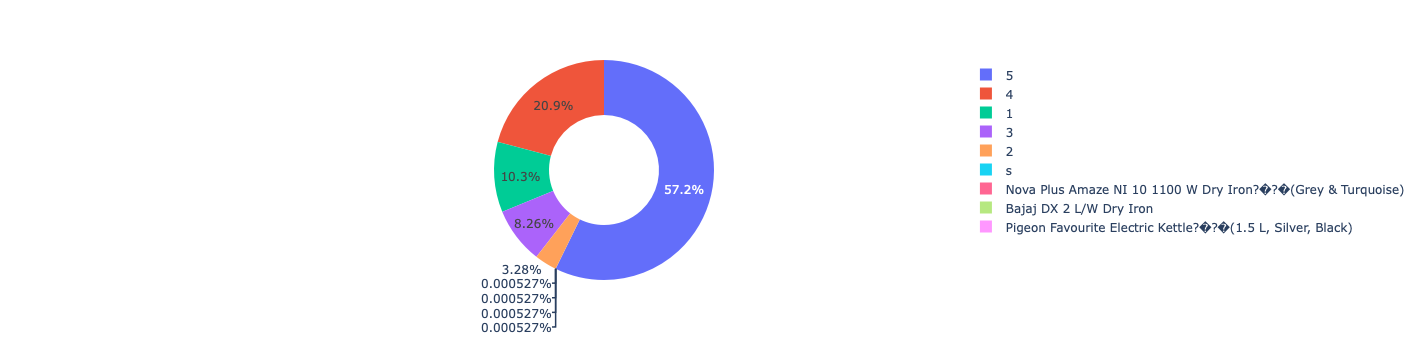

In [33]:
ratings = data['Rate'].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

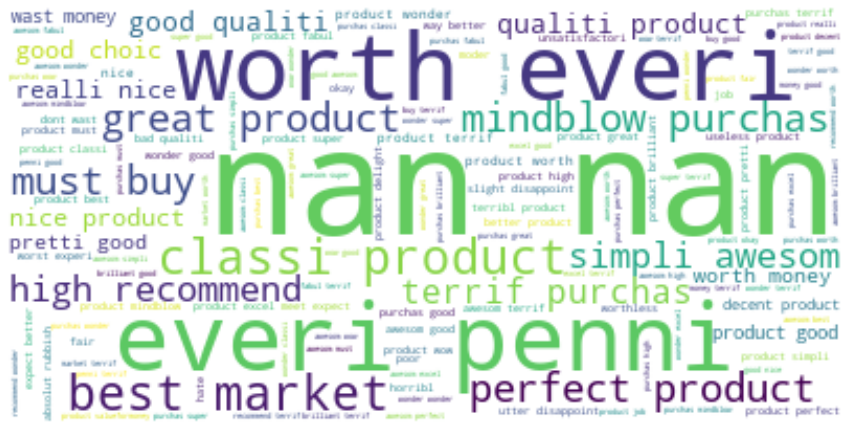

In [34]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mihir/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Review  Positive  Negative  Neutral
0            super       1.0     0.000    0.000
1           awesom       0.0     0.000    1.000
2             fair       1.0     0.000    0.000
3  useless product       0.0     0.737    0.263
4             fair       1.0     0.000    0.000


In [15]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [16]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  75299.973999979
Negative:  7501.001999999518
Neutral:  107050.02699999783
